# Analisis

In [1]:
import numpy as np

#import matplotlib
#matplotlib.use('Agg')
#import pylab as plt

import matplotlib.pylab as plt


import datetime
import pandas as pd
from matplotlib.ticker import FormatStrFormatter

In [2]:
path = "../data"   #Path server 
#path = "./data" 

p_header="%s/header.txt" %(path)
p_data="%s/mobile_consume.csv" %(path)

In [3]:
header = pd.read_csv(p_header)
#data = pd.read_csv(p_data , header = None, dtype={'GB_TOTAL': float,'HORA': int})

data = pd.read_csv(p_data , header = None,  dtype=None, low_memory=False)
data.columns = list(header)
print("Loaded Data")

Loaded Data


In [4]:
# data.head()

,CO_ID,BILLCYCLE,NUMCODPLANTARIFARIO,F_ACT,F_TRAFICO,HORA,GB_TOTAL,NO_FREE,FREE,BANCOS,...,SPOTIFY_PI,APPLEM_PI,SOUNDC_PI,FACE_PI,MAIL_PI,WHATS_RO_I,WHATS_RO_IF,WAZE_RO,EMAIL_RO,WHARS_RO2
0,10002698,3.0,1981,12/05/2015,01/08/2018,0,0.0004,0.0000,0.0,0.0,...,0.0,0,0.0,0,0,0.0,0.0,0.0,0,0.0
1,10002698,3.0,1981,12/05/2015,01/08/2018,1,0.0204,0.0003,0.0,0.0,...,0.0,0,0.0,0,0,0.0,0.0,0.0,0,0.0
2,10002698,3.0,1981,12/05/2015,01/08/2018,2,0.0386,0.0001,0.0,0.0,...,0.0,0,0.0,0,0,0.0,0.0,0.0,0,0.0
3,10002698,3.0,1981,12/05/2015,01/08/2018,3,0.0007,0.0001,0.0,0.0,...,0.0,0,0.0,0,0,0.0,0.0,0.0,0,0.0
4,10002698,3.0,1981,12/05/2015,02/08/2018,0,0.0007,0.0000,0.0,0.0,...,0.0,0,0.0,0,0,0.0,0.0,0.0,0,0.0


In [5]:
data["BILLCYCLE"] = data["BILLCYCLE"].fillna(9)

In [6]:
data['F_TRAFICO'] = pd.to_datetime(data['F_TRAFICO'], format='%d/%m/%Y', errors='coerce')

In [7]:
#data['F_TRAFICO'] = pd.to_datetime(data['F_TRAFICO'])

In [8]:
data['WEEK_DAY'] = data['F_TRAFICO'].dt.dayofweek
print("Ploting...")

Ploting...


Finalizado


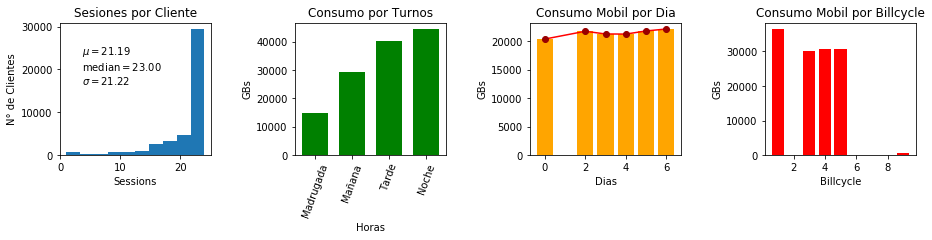

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(14,2), sharex='col')
ax1, ax2, ax3, ax4 = axes.flatten()
plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.55, wspace=0.55)

y = data.groupby(['CO_ID']).count()      # Us por cliente
y = y["BILLCYCLE"].tolist()
mu = np.mean(y)
median = np.median(y)
sigma = np.var(y)
text = '$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$' % (mu, median, sigma)
ax1.hist(y,10)
ax1.set_title('Sesiones por Cliente')
ax1.set_xlabel('Sessions')
ax1.set_ylabel('N° de Clientes')
ax1.text(0.15, 0.85, text, transform=ax1.transAxes, fontsize=10, verticalalignment='top')

tag =[' ','Madrugada','Mañana','Tarde','Noche']  
y = data.groupby(['HORA']).sum()['GB_TOTAL']
x = y.index
y = y.values
ax2.bar(x,y,0.7,color='green')
ax2.set_xticklabels(data['HORA'].unique())
ax2.set_xticklabels(tag, rotation=70)
ax2.set_title('Consumo por Turnos')
ax2.set_xlabel('Horas')
ax2.set_ylabel('GBs')

y = data.groupby(['WEEK_DAY']).sum()['GB_TOTAL']
ax3.bar(list(y.keys()),list(y.values),  align='center', color='Orange')
ax3.plot(y.index,y.values,'-',color='#ff0000')
ax3.plot(y.index,y.values,'ob',color='#990000')
ax3.set_title('Consumo Mobil por Dia')
ax3.set_xlabel('Dias')
ax3.set_ylabel('GBs')

y = data.groupby(['BILLCYCLE']).sum()['GB_TOTAL']
ax4.bar(list(y.index),y.values,color='Red',label="y.index")
ax4.set_title('Consumo Mobil por Billcycle')
ax4.set_xlabel('Billcycle')
ax4.set_ylabel('GBs')

plt.savefig("./resultados/Analisis.png",dpi = 1000)
print("Finalizado")